<a href="https://colab.research.google.com/github/hoo0681/raspi4withTF/blob/master/1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
 %tensorflow_version 2.x

import tensorflow as tf

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

# set auto tune
AUTOTUNE = tf.data.experimental.AUTOTUNE

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.1.0-rc1
NumPy Version :1.17.5
Matplotlib Version :3.1.2


In [0]:
# 지정 폴더 아래에 있는 모든 *.jpg 파일의 수
#  및 폴더명 목록을 리턴  
def check_dir(d_path):
    img_count = len(list(d_path.glob('*/*.jpg')))
    c_name = np.array([item.name for item in d_path.glob('*') if item.name != "LICENSE.txt"])
    return img_count, c_name

In [4]:
!unzip /content/drive/My\ Drive/tf2/z_data/asirra_fixed.zip

Archive:  /content/drive/My Drive/tf2/z_data/asirra_fixed.zip
   creating: asirra/
   creating: asirra/test/
   creating: asirra/test/cat/
  inflating: asirra/test/cat/cat.10.jpg  
  inflating: asirra/test/cat/cat.100.jpg  
  inflating: asirra/test/cat/cat.1000.jpg  
  inflating: asirra/test/cat/cat.10000.jpg  
  inflating: asirra/test/cat/cat.10002.jpg  
  inflating: asirra/test/cat/cat.10005.jpg  
  inflating: asirra/test/cat/cat.10006.jpg  
  inflating: asirra/test/cat/cat.10007.jpg  
  inflating: asirra/test/cat/cat.10008.jpg  
  inflating: asirra/test/cat/cat.10009.jpg  
  inflating: asirra/test/cat/cat.1001.jpg  
  inflating: asirra/test/cat/cat.10010.jpg  
  inflating: asirra/test/cat/cat.10012.jpg  
  inflating: asirra/test/cat/cat.10018.jpg  
  inflating: asirra/test/cat/cat.10019.jpg  
  inflating: asirra/test/cat/cat.10020.jpg  
  inflating: asirra/test/cat/cat.10021.jpg  
  inflating: asirra/test/cat/cat.10023.jpg  
  inflating: asirra/test/cat/cat.10025.jpg  
  inflating: 

In [0]:
import pathlib
train_data_dir_cwd=pathlib.Path('/content/asirra/train')
test_data_dir_cwd=pathlib.Path('/content/asirra/test')

In [6]:
image_count_cwd, CLASS_NAMES_cwd = check_dir(train_data_dir_cwd)
test_image_count_cwd, CLASS_NAMES_cwd = check_dir(test_data_dir_cwd)
print('image_count: {}\nclasses: {}'.format(image_count_cwd, CLASS_NAMES_cwd))
print('image_count: {}\nclasses: {}'.format(test_image_count_cwd, CLASS_NAMES_cwd))

image_count: 12500
classes: ['dog' 'cat']
image_count: 12500
classes: ['dog' 'cat']


# 변형된 데이터 사용

In [0]:
train_x=np.load(file='/content/drive/My Drive/train_data_150_img.npy',allow_pickle=True)
train_y=np.load(file='/content/drive/My Drive/train_data_150_label.npy',allow_pickle=True)

In [0]:
#width_shift_range=0.3,height_shift_range=0.3,horizontal_flip=True,vertical_flip=True,rotation_range=45,zoom_range=0.2
gen_arg=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3,height_shift_range=0.3)
arg_train=gen_arg.flow(x=train_x,y=train_y,batch_size=12500,shuffle=True)

# 변형안된 데이터사용

In [7]:
datagen_2=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
generator_2=datagen_2.flow_from_directory(
    directory=str(train_data_dir_cwd),
    batch_size=512,
    shuffle=True,
    target_size=(150, 150)
)
generator_2_test=datagen_2.flow_from_directory(
    directory=str(test_data_dir_cwd),
    batch_size=512,
    shuffle=True,
    target_size=(150, 150)
)


Found 12500 images belonging to 2 classes.
Found 12500 images belonging to 2 classes.


In [0]:
import tensorflow.keras.layers as layers
from tensorflow.keras import models
def model_function():
    input_= layers.Input(shape=( generator_2.image_shape))                   # (28,28,1)
    x=layers.Conv2D(64,3,padding='same',activation='relu',name='conv32')(input_)
    x=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
    x=layers.Conv2D(32,3,padding='same',activation='relu',name='conv32_2')(x)
    x=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
    x=layers.Conv2D(32,3,padding='same',activation='relu',name='conv32_3')(x)
    x=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
    x=layers.Flatten()(x)
    x=layers.Dense(64,activation='relu')(x)
    x=layers.Dropout(0.5)(x)
    x=layers.Dense(32,activation='relu')(x)
    prediction = layers.Dense(2,activation='softmax')(x) # (?,10)<-(?,30)
    # return model
    return models.Model(input_, prediction)

In [28]:
model=model_function()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv32 (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv32_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv32_3 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 32)        0   

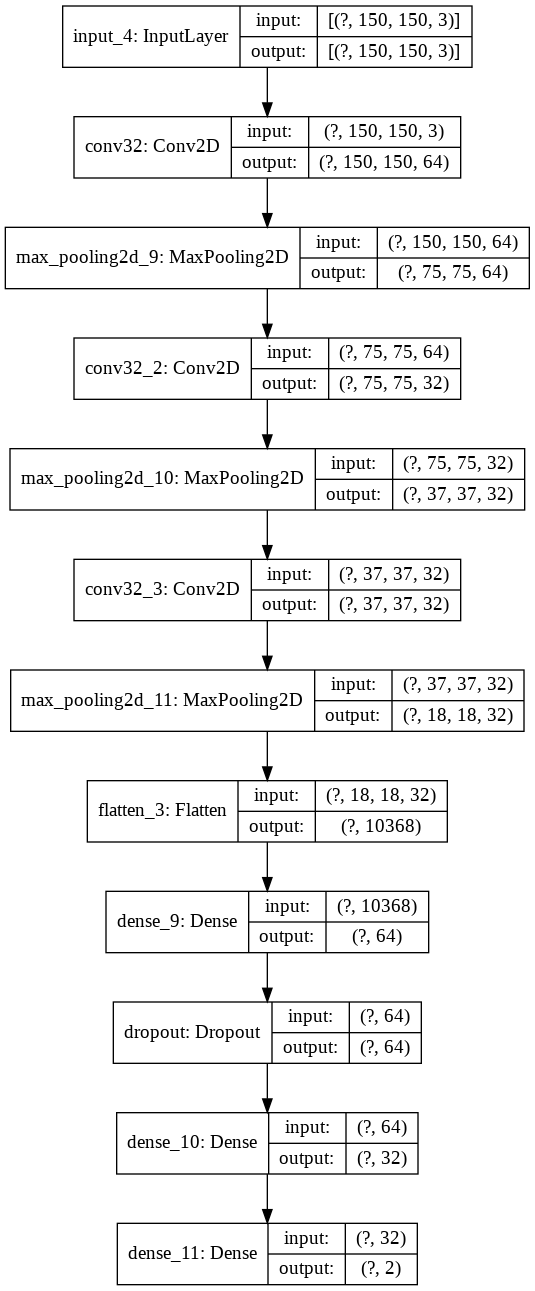

In [25]:
tf.keras.utils.plot_model(model, 'modle1_test.png', show_shapes=True)

In [0]:
%%time
history=model.fit(generator_2,epochs=10,validation_data=generator_2_test,validation_steps=5)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 25 steps, validate for 5 steps
Epoch 1/10
25/25 [==============================] - 321s 13s/step - loss: 0.6950 - accuracy: 0.5260 - val_loss: 0.6760 - val_accuracy: 0.6230
Epoch 2/10
25/25 [==============================] - 320s 13s/step - loss: 0.6853 - accuracy: 0.5868 - val_loss: 0.6438 - val_accuracy: 0.6645
Epoch 3/10
 4/25 [===>..........................] - ETA: 4:47 - loss: 0.6453 - accuracy: 0.6460

In [14]:
np.save(file='1_2HISTORY',arr=history)
%cp 1_2HISTORY.npy /content/drive/My Drive

NameError: ignored

In [0]:
%%time
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')

plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.8])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 0.9])
plt.legend(loc='best')
plt.show()

In [0]:
model.predict(gen)